# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Restart the Kernel after you execute this command.

!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 31.1 MB/s eta 0:00:01
     |████████████████████████████████| 216 kB 83.8 MB/s eta 0:00:01


**Important: Restart the Kernel at this moment**

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##
train_transforms =transforms.Compose([#transforms.Resize(256),
                                     # transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                      ])
test_transforms = transforms.Compose([#transforms.Resize(256),
                                    #  transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))])
# Create training set and define training dataloader
## YOUR CODE HERE ##
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=train_transforms)
train_size = int(0.8 * len(train_dataset))  # 80%
valid_size = len(train_dataset) - train_size  # 20%

train_data, valid_data = torch.utils.data.random_split(train_dataset, [train_size, valid_size])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=1000, shuffle=False)
# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1000, shuffle=False)


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

0


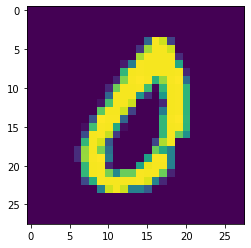

2


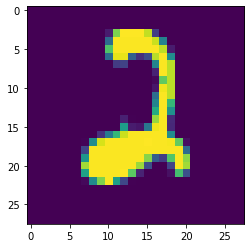

5


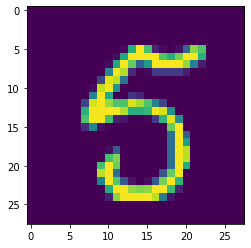

3


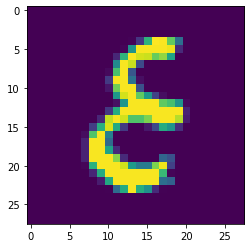

4


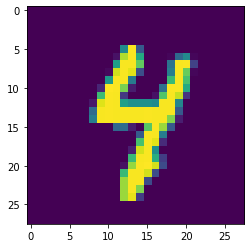

In [4]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [5]:
## YOUR CODE HERE ##
model= nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 10),
    nn.LogSoftmax(dim=1))

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [6]:
## YOUR CODE HERE ##
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [7]:
## YOUR CODE HERE ##
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device);
epochs = 10
print_every = 64
train_losses = []
valid_losses = []
valid_accuracies = []
for e in range(epochs):
    steps = 0
    running_loss = 0
    for images, labels in train_loader:
        steps +=1
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        
        train_log_ps = model(images)
        loss = criterion(train_log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if steps % print_every == 0:
            model.eval()
            valid_loss = 0
            valid_accuracy = 0
            # Turn off gradients for validation, saves memory and computations
            with torch.no_grad():
                for images_valid, labels_valid in valid_loader:
                    images_valid, labels_valid = images_valid.to(device), labels_valid.to(device)
                    log_ps = model(images_valid)
                    batch_loss = criterion(log_ps, labels_valid)
                    valid_loss += batch_loss.item()
                    ps = torch.exp(log_ps)
                    top_p, top_class = ps.topk(1)
                    equals =( top_class == labels_valid.view(*top_class.shape))
                    valid_accuracy += (equals.type(torch.FloatTensor)).sum().item()

            print(f"Epoch {e+1}/{epochs}.. "
              f"Train loss: {running_loss/print_every:.3f}.. "
              f"Validation loss: {valid_loss/len(valid_loader):.3f}.. "
              f"Validiation accuracy: {valid_accuracy/len(valid_loader)/100:.3f}")
            train_losses.append(running_loss/print_every)
            valid_losses.append(valid_loss/len(valid_loader))
            valid_accuracies.append(valid_accuracy/len(valid_loader)/100)
        model.train()

Epoch 1/10.. Train loss: 1.195.. Validation loss: 0.685.. Validiation accuracy: 7.806
Epoch 1/10.. Train loss: 1.942.. Validation loss: 0.567.. Validiation accuracy: 8.261
Epoch 1/10.. Train loss: 2.598.. Validation loss: 0.503.. Validiation accuracy: 8.461
Epoch 1/10.. Train loss: 3.178.. Validation loss: 0.455.. Validiation accuracy: 8.550
Epoch 1/10.. Train loss: 3.745.. Validation loss: 0.412.. Validiation accuracy: 8.755
Epoch 1/10.. Train loss: 4.251.. Validation loss: 0.389.. Validiation accuracy: 8.847
Epoch 1/10.. Train loss: 4.731.. Validation loss: 0.368.. Validiation accuracy: 8.922
Epoch 1/10.. Train loss: 5.196.. Validation loss: 0.343.. Validiation accuracy: 8.944
Epoch 1/10.. Train loss: 5.636.. Validation loss: 0.330.. Validiation accuracy: 9.027
Epoch 1/10.. Train loss: 6.087.. Validation loss: 0.319.. Validiation accuracy: 9.026
Epoch 1/10.. Train loss: 6.490.. Validation loss: 0.305.. Validiation accuracy: 9.083
Epoch 2/10.. Train loss: 0.403.. Validation loss: 0.28

Epoch 9/10.. Train loss: 2.278.. Validation loss: 0.152.. Validiation accuracy: 9.518
Epoch 9/10.. Train loss: 2.537.. Validation loss: 0.158.. Validiation accuracy: 9.494
Epoch 9/10.. Train loss: 2.807.. Validation loss: 0.161.. Validiation accuracy: 9.492
Epoch 10/10.. Train loss: 0.257.. Validation loss: 0.153.. Validiation accuracy: 9.515
Epoch 10/10.. Train loss: 0.499.. Validation loss: 0.152.. Validiation accuracy: 9.527
Epoch 10/10.. Train loss: 0.749.. Validation loss: 0.158.. Validiation accuracy: 9.500
Epoch 10/10.. Train loss: 1.008.. Validation loss: 0.151.. Validiation accuracy: 9.519
Epoch 10/10.. Train loss: 1.246.. Validation loss: 0.159.. Validiation accuracy: 9.498
Epoch 10/10.. Train loss: 1.498.. Validation loss: 0.161.. Validiation accuracy: 9.484
Epoch 10/10.. Train loss: 1.733.. Validation loss: 0.159.. Validiation accuracy: 9.492
Epoch 10/10.. Train loss: 1.970.. Validation loss: 0.149.. Validiation accuracy: 9.534
Epoch 10/10.. Train loss: 2.221.. Validation l

Plot the training loss (and validation loss/accuracy, if recorded).

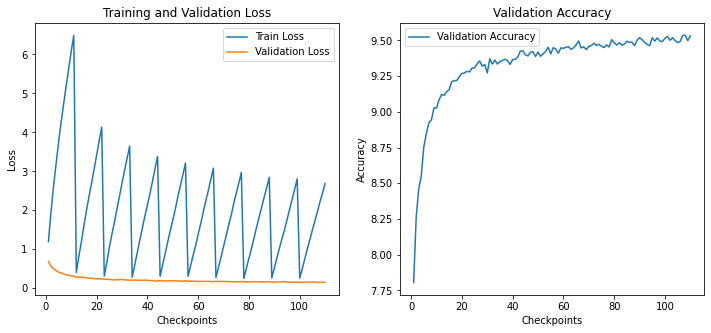

In [8]:
## YOUR CODE HERE ##
epochs_range = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, valid_losses, label='Validation Loss')
plt.xlabel('Checkpoints')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, valid_accuracies, label='Validation Accuracy')
plt.xlabel('Checkpoints')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')

plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [9]:
## YOUR CODE HERE ##
test_loss = 0
accuracy = 0
model.eval()
with torch.no_grad():
    for images_test, labels_test in test_loader:
        images_test, labels_test = images_test.to(device), labels_test.to(device)
        log_ps = model(images_test)
        batch_loss = criterion(log_ps, labels_test)
        test_loss += batch_loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1)
        equals =( top_class == (labels_test.view(*top_class.shape)))
        accuracy += (equals.type(torch.FloatTensor)).sum().item()
print(f"Test loss: {test_loss/len(test_loader):.3f}.. "
      f"Test accuracy: {accuracy/len(test_loader)/100:.3f}")

Test loss: 0.148.. Test accuracy: 9.557


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [10]:
## YOUR CODE HERE ##
optimizer = optim.Adam(model.parameters(), lr=0.0005)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device);
epochs = 30
print_every = 64
train_losses = []
valid_losses = []
valid_accuracies = []
for e in range(epochs):
    steps = 0
    running_loss = 0
    for images, labels in train_loader:
        steps +=1
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        
        train_log_ps = model(images)
        loss = criterion(train_log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if steps % print_every == 0:
            model.eval()
            valid_loss = 0
            valid_accuracy = 0
            # Turn off gradients for validation, saves memory and computations
            with torch.no_grad():
                for images_valid, labels_valid in valid_loader:
                    images_valid, labels_valid = images_valid.to(device), labels_valid.to(device)
                    log_ps = model(images_valid)
                    batch_loss = criterion(log_ps, labels_valid)
                    valid_loss += batch_loss.item()
                    ps = torch.exp(log_ps)
                    top_p, top_class = ps.topk(1)
                    equals =( top_class == labels_valid.view(*top_class.shape))
                    valid_accuracy += (equals.type(torch.FloatTensor)).sum().item()

            print(f"Epoch {e+1}/{epochs}.. "
              f"Train loss: {running_loss/print_every:.3f}.. "
              f"Validation loss: {valid_loss/len(valid_loader):.3f}.. "
              f"Validiation accuracy: {valid_accuracy/len(valid_loader)/100:.3f}")
            train_losses.append(running_loss/print_every)
            valid_losses.append(valid_loss/len(valid_loader))
            valid_accuracies.append(valid_accuracy/len(valid_loader)/100)
        model.train()

Epoch 1/30.. Train loss: 0.217.. Validation loss: 0.148.. Validiation accuracy: 9.534
Epoch 1/30.. Train loss: 0.436.. Validation loss: 0.151.. Validiation accuracy: 9.521
Epoch 1/30.. Train loss: 0.670.. Validation loss: 0.148.. Validiation accuracy: 9.547
Epoch 1/30.. Train loss: 0.892.. Validation loss: 0.145.. Validiation accuracy: 9.540
Epoch 1/30.. Train loss: 1.109.. Validation loss: 0.145.. Validiation accuracy: 9.544
Epoch 1/30.. Train loss: 1.338.. Validation loss: 0.147.. Validiation accuracy: 9.539
Epoch 1/30.. Train loss: 1.573.. Validation loss: 0.142.. Validiation accuracy: 9.540
Epoch 1/30.. Train loss: 1.797.. Validation loss: 0.145.. Validiation accuracy: 9.541
Epoch 1/30.. Train loss: 2.023.. Validation loss: 0.143.. Validiation accuracy: 9.546
Epoch 1/30.. Train loss: 2.252.. Validation loss: 0.140.. Validiation accuracy: 9.554
Epoch 1/30.. Train loss: 2.479.. Validation loss: 0.138.. Validiation accuracy: 9.562
Epoch 2/30.. Train loss: 0.209.. Validation loss: 0.14

Epoch 9/30.. Train loss: 1.795.. Validation loss: 0.127.. Validiation accuracy: 9.598
Epoch 9/30.. Train loss: 1.980.. Validation loss: 0.128.. Validiation accuracy: 9.597
Epoch 9/30.. Train loss: 2.177.. Validation loss: 0.126.. Validiation accuracy: 9.603
Epoch 10/30.. Train loss: 0.193.. Validation loss: 0.132.. Validiation accuracy: 9.586
Epoch 10/30.. Train loss: 0.382.. Validation loss: 0.130.. Validiation accuracy: 9.599
Epoch 10/30.. Train loss: 0.583.. Validation loss: 0.132.. Validiation accuracy: 9.578
Epoch 10/30.. Train loss: 0.780.. Validation loss: 0.128.. Validiation accuracy: 9.578
Epoch 10/30.. Train loss: 0.984.. Validation loss: 0.127.. Validiation accuracy: 9.583
Epoch 10/30.. Train loss: 1.179.. Validation loss: 0.127.. Validiation accuracy: 9.591
Epoch 10/30.. Train loss: 1.382.. Validation loss: 0.131.. Validiation accuracy: 9.591
Epoch 10/30.. Train loss: 1.582.. Validation loss: 0.128.. Validiation accuracy: 9.604
Epoch 10/30.. Train loss: 1.767.. Validation l

Epoch 18/30.. Train loss: 0.895.. Validation loss: 0.121.. Validiation accuracy: 9.619
Epoch 18/30.. Train loss: 1.085.. Validation loss: 0.120.. Validiation accuracy: 9.618
Epoch 18/30.. Train loss: 1.249.. Validation loss: 0.125.. Validiation accuracy: 9.619
Epoch 18/30.. Train loss: 1.443.. Validation loss: 0.125.. Validiation accuracy: 9.621
Epoch 18/30.. Train loss: 1.641.. Validation loss: 0.126.. Validiation accuracy: 9.602
Epoch 18/30.. Train loss: 1.840.. Validation loss: 0.128.. Validiation accuracy: 9.602
Epoch 18/30.. Train loss: 2.019.. Validation loss: 0.129.. Validiation accuracy: 9.599
Epoch 19/30.. Train loss: 0.176.. Validation loss: 0.124.. Validiation accuracy: 9.602
Epoch 19/30.. Train loss: 0.354.. Validation loss: 0.125.. Validiation accuracy: 9.628
Epoch 19/30.. Train loss: 0.543.. Validation loss: 0.122.. Validiation accuracy: 9.606
Epoch 19/30.. Train loss: 0.712.. Validation loss: 0.122.. Validiation accuracy: 9.619
Epoch 19/30.. Train loss: 0.882.. Validatio

Epoch 27/30.. Train loss: 0.162.. Validation loss: 0.120.. Validiation accuracy: 9.624
Epoch 27/30.. Train loss: 0.332.. Validation loss: 0.125.. Validiation accuracy: 9.608
Epoch 27/30.. Train loss: 0.510.. Validation loss: 0.120.. Validiation accuracy: 9.617
Epoch 27/30.. Train loss: 0.676.. Validation loss: 0.123.. Validiation accuracy: 9.619
Epoch 27/30.. Train loss: 0.831.. Validation loss: 0.123.. Validiation accuracy: 9.624
Epoch 27/30.. Train loss: 0.999.. Validation loss: 0.120.. Validiation accuracy: 9.633
Epoch 27/30.. Train loss: 1.169.. Validation loss: 0.121.. Validiation accuracy: 9.636
Epoch 27/30.. Train loss: 1.339.. Validation loss: 0.121.. Validiation accuracy: 9.623
Epoch 27/30.. Train loss: 1.511.. Validation loss: 0.120.. Validiation accuracy: 9.625
Epoch 27/30.. Train loss: 1.693.. Validation loss: 0.121.. Validiation accuracy: 9.613
Epoch 27/30.. Train loss: 1.862.. Validation loss: 0.120.. Validiation accuracy: 9.623
Epoch 28/30.. Train loss: 0.157.. Validatio

In [11]:
test_loss = 0
accuracy = 0
model.eval()
with torch.no_grad():
    for images_test, labels_test in test_loader:
        images_test, labels_test = images_test.to(device), labels_test.to(device)
        log_ps = model(images_test)
        batch_loss = criterion(log_ps, labels_test)
        test_loss += batch_loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1)
        equals =( top_class == (labels_test.view(*top_class.shape)))
        accuracy += (equals.type(torch.FloatTensor)).sum().item()
print(f"Test loss: {test_loss/len(test_loader):.3f}.. "
      f"Test accuracy: {accuracy/len(test_loader)/100:.3f}")

Test loss: 0.123.. Test accuracy: 9.650


## Saving your model
Using `torch.save`, save your model for future loading.

In [12]:
## YOUR CODE HERE ##
checkpoint = {'model': 'nn.Sequential(nn.Flatten(),nn.Linear(28*28, 128),nn.ReLU(),nn.Dropout(0.5),nn.Linear(128, 10),nn.LogSoftmax(dim=1))',
              'input_size': 28*28,
              'output_size': 10,
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')